# Improving your model

## All we do is experimental we cant gaurantee better score

Frist prediction = Baseline prediction

With respect to the data
* Could we collect more data?
* Can we improve our data?(adding more attributes)

Wih respect to the model
* Can we use better model?(check the road map)
* Could we improve the current model?


Hyperparameter = settings on the model you can adjust to improve
                 its ability to find the patterns
                 
* By hand 
* Random with RandomSearchCV
* Exhaustively with GridSearchCV


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split 

In [2]:
def evaluate_preds(y_true, y_preds):
    
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    metric_dict = {'Accuracy':round(accuracy,2),
                   'Precision':round(precision,2),
                   'Recall':round(recall,2),
                   'f1':round(f1,2)}
    print(f"Accuracy:{accuracy * 100:.2f}%")
    print(f"Precision:{precision:.2f}")
    print(f"Recall:{recall:.2f}")
    print(f"f1:{f1:.2f}")
    
    return metric_dict

## Tuning hyperparameter by hand

Make three sets
* Test dataset 
* Train dataset
* Validation dataset

### Parameters that are going to be adjust:
* max_depth
* max_features
* min_samples_leaf
* min_samples_split
* n_estimators

In [3]:
#import the data

heart_dataset = pd.read_csv("heart-disease.csv")

In [4]:
np.random.seed(42) # reuse our selected data

# shuffle the data
heart_dataset_shuffled = heart_dataset.sample(frac=1)

# Split it into X and Y

x = heart_dataset_shuffled.drop("target",axis=1)
y = heart_dataset_shuffled["target"]

# Split the data into train, validation, test sets
train_split = round(0.7 * len(heart_dataset_shuffled)) # 70% of the data
valid_split = round(train_split + 0.15 * len(heart_dataset_shuffled)) #15% of the data
# The remaining 15% for test

x_train, y_train = x[:train_split],y[:train_split]
x_valid,y_valid = x[train_split:valid_split],y[train_split:valid_split]
x_test,y_test = x[valid_split:],y[valid_split:]

# Fit the model
clf = RandomForestClassifier()
clf.fit(x_train,y_train)

#Baseline prediction : validation set
y_preds = clf.predict(x_valid)

# Evaluate the model
baseline_metrics = evaluate_preds(y_valid,y_preds)

Accuracy:82.22%
Precision:0.81
Recall:0.88
f1:0.85


In [5]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Parameters that are going to be adjust:
* max_depth
* max_features
* min_samples_leaf
* min_samples_split
* n_estimators

In [6]:
np.random.seed(42)
clf2 = RandomForestClassifier(max_depth=20,n_estimators=20) # u can try changing all the attributes mentioned above
clf2.fit(x_train,y_train)

y_preds2 = clf2.predict(x_valid)

clf2_metrics = evaluate_preds(y_valid,y_preds2)

Accuracy:80.00%
Precision:0.81
Recall:0.84
f1:0.82


### As you can see there is an sligth change(in this case in a bad way)

### We have to try this in a trail and error method but it will take time

### scikit learn as ready made method to do it.

## Hyperameter tuning with RandomizedSearchCV

In [7]:
from sklearn.model_selection import RandomizedSearchCV

# Dictionary of the valuse that we are going to adjust

grid = {"n_estimators":[10,100,200,500,1000,2000],
        "max_depth":[None,5,10,20,30],
        "max_features":["auto","sqrt"],
        "min_samples_split":[2,4,6],
        "min_samples_leaf":[1,2,4]}

np.random.seed(42)

#split x and y

x = heart_dataset_shuffled.drop("target",axis=1)
y = heart_dataset_shuffled["target"]

# Split into training and test data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#instanciate

clf = RandomForestClassifier(n_jobs=1)

#n_jobs : how much of your computer you are dedicating for this ML model
  
# RandomizedSearchCV

rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10,# number of models to try
                            cv=5,# 5 fold crossvalidation
                            verbose=2)

#fit the model
rs_clf.fit(x_train,y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000; total time=   4.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000; total time=   4.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000; total time=   4.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000; total time=   4.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000; total time=   4.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

In [8]:
#the best fit
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 30}

In [9]:
# by default the predict will use the best fit

rs_y_preds = rs_clf.predict(x_test)

#evaluate

rs_metrics = evaluate_preds(y_test,rs_y_preds)

Accuracy:81.97%
Precision:0.76
Recall:0.89
f1:0.82


## GridSearchCV

In [10]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 2000],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

## this is a bruteforce search

## mul of elements in the above grid

## 6 * 5 * 2 * 3 * 3 * 5(CV)= 2700 combinations

## inorder to control the execution we will reduce the dimentions

In [11]:
grid2 = {"n_estimators":[100,200,500],
        "max_depth":[None],
        "max_features":["auto","sqrt"],
        "min_samples_split":[6],
        "min_samples_leaf":[1,2]} # based on previous best fit

# 3*1*2*1*2*5 =60

In [12]:
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

#split x and y

x = heart_dataset_shuffled.drop("target",axis=1)
y = heart_dataset_shuffled["target"]

# Split into training and test data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#instanciate

clf = RandomForestClassifier(n_jobs=1)

#n_jobs : how much of your computer you are dedicating for this ML model
  
# GridSearchCV

gs_clf = GridSearchCV(estimator=clf,
                            param_grid=grid2,
                            cv=5,
                            verbose=2)

#fit the model
gs_clf.fit(x_train,y_train);


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

In [13]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [14]:
gs_y_preds = gs_clf.predict(x_test)

#evaluate
gs_metrics = evaluate_preds(y_test,gs_y_preds)

Accuracy:78.69%
Precision:0.74
Recall:0.82
f1:0.78


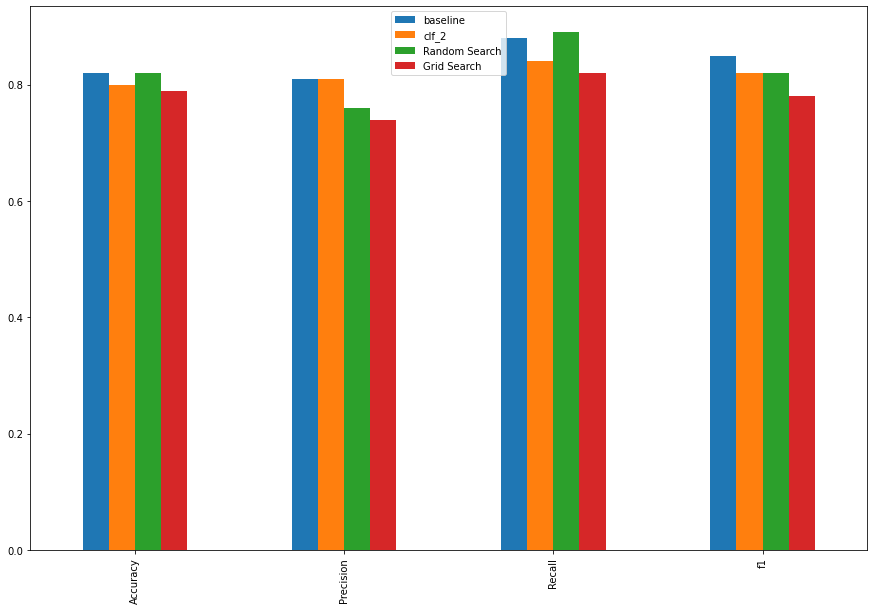

In [15]:
compare_metrics = pd.DataFrame({"baseline":baseline_metrics,
                    "clf_2":clf2_metrics,
                    "Random Search":rs_metrics,
                    "Grid Search":gs_metrics})
compare_metrics.plot.bar(figsize = (15,10));